In [1]:
# from pymongo import MongoClient
# from pprint import pprint
# client= MongoClient()
# db=client.amzelec
# amzelecmeta=db.amzelecmeta
# amzelecreview=db.amzelecreview
# # amzbaby.drop()
# # for review in reviews:
# #     hmm.save(review)####save each document into hmm collection
# # cursor = hmm.find()####finds everything in the document

In [2]:
# import json
# import gzip
# import pprint as pprint
# def parse(path):
#   g = gzip.open(path, 'r')
#   for l in g:
#     yield json.dumps(eval(l))

# cnt=0
# for l in parse("meta_Electronics.json.gz"):

#     amzelecmeta.save(json.loads(l))
#     cnt=cnt+1
#     if cnt%1000 == 0:
#         print cnt

# # pprint.pprint(o) 

In [3]:
# cnt=0
# for l in parse("reviews_Electronics.json.gz"):

#     amzelecreview.save(json.loads(l))
#     cnt=cnt+1
#     if cnt%1000 == 0:
#         print cnt

In [4]:
# f = open("output.strict2", 'w')
# cnt=0
# for l in parse("reviews_Baby.json.gz"):
# #     print l
#     f.write(l + '\n')
#     cnt=cnt+1
#     if cnt>3:
#         break
# o = json.loads(l)  
# pprint.pprint(o) 

In [5]:
# print amzbaby.count()
# amzbaby.drop()

In [6]:
# import pprint
# pprint.pprint(amzelecmeta.find_one())


In [7]:
# pprint.pprint(amzelecreview.find_one())

In [8]:
# amzbabyreview.drop()
# amzbabymeta.drop()

# print amzbabymeta.count()
# print amzbabyreview.count()

In [9]:
####we run it only once
# import graphlab as gl
# import os
# data = gl.SFrame.read_csv("reviews_Electronics.json.gz", header=False)
# data.save('./elec_rev_data_new')
#data.head()

In [1]:
## ###we run it only once--especially this one
## import graphlab as gl
## (sf,badlines)= gl.SFrame.read_csv_with_errors("meta_Electronics.json.gz",column_type_hints=dict,header=False)
## # data2 = gl.SFrame.read_csv("meta_Electronics.json.gz",column_type_hints=dict,header=False)
## # data=datatuple[1]
## sf.save('./elec_meta_data_new')
import graphlab as gl
gl.set_runtime_config('GRAPHLAB_SFRAME_GROUPBY_BUFFER_NUM_ROWS', 10000000)

[INFO] This trial license of GraphLab Create is assigned to revanthg@hotmail.com and will expire on July 10, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-404 - Server binary: /Users/revanthgarlapati/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434031152.log
[INFO] GraphLab Server Version: 1.4.0


In [2]:
elec_rev_data = gl.load_sframe('./elec_rev_data_new')
elec_meta_data = gl.load_sframe('./elec_meta_data_new')
# data.unpack
# data.unpack

In [4]:
# elec_rev_data.head()


In [6]:
# elec_meta_data.head()

In [5]:
elec_meta_data = elec_meta_data.unpack('X1', column_name_prefix='')
elec_meta_data.head()


asin,brand,categories,imUrl,price
0132793040,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31JIPhp% ...,None
0321732944,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31uogm6Y ...,None
0439886341,None,"[[Electronics, Computers& Accessories, PDAs, ...",http://ecx.images-amazon.com/images/I/51k0qa8f ...,8.15
0511189877,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/41HaAhbv ...,23.36
0528881469,None,"[[Electronics, GPS &Navigation, Vehicle GPS, ...",http://ecx.images-amazon.com/images/I/51FnRkJq ...,299.99
0558835155,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/21rEirnd ...,13.95
0594012015,Barnes &amp; Noble,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41kQsHT8 ...,32.1
0594017580,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41CqeMM0 ...,78.83
0594450209,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/31KkpByX ...,15.55
0594287995,None,"[[Electronics, eBookReaders & Accessories, ...",http://g-ecx.images-amazon.com/images/G/01/x-s ...,None


In [6]:
##takes more than a minute
elec_rev_data = elec_rev_data.unpack('X1', column_name_prefix='')
elec_rev_data.head()


asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [7]:
elec_rev_data_revtext=elec_rev_data['reviewText']

elec_rev_data_revtext.head()

# elec_rev_data_revtext_small=elec_rev_data_revtext[0:1000]

# elec_rev_data_revtext_list=list(elec_rev_data_revtext)
# elec_rev_data_revtext[0]

# elec_rev_data.column_names()
# appending the first review that would be overwritten by new column name "X1" later
# temp3=gl.SFrame([elec_rev_data[0]])
# type(temp3)
# type(elec_rev_data)

# import graphlab as gl
# docs = gl.SArray('http://s3.amazonaws.com/dato-datasets/nips-text')
# m1 = gl.topic_model.create(docs, num_topics=30, num_iterations=50, verbose=False, print_interval=0)

dtype: str
Rows: 10
['Corey Barker does a great job of explaining Blend Modes in this DVD. All of the Kelby training videos are great but pricey to buy individually. If you really want bang for your buck just subscribe to Kelby Training online.', "While many beginner DVDs try to teach you everything there is to know about Photoshop CS5, this introductory course shows you the critical things you need to know to start feeling confident in your Photoshop skills. Bestselling author and Photoshop trainer, Matt Kloskowski shows you exactly what you need to know about tools, filters, adjustments, palettes, and menu items to hit the ground running in Photoshop. These include: layers and how they're key to mastering Photoshop, selections and the essential tools you really need to worry about, getting started with Camera Raw and which Retouching tools you'll find the most helpful. When you're done with this DVD you'll have a solid grasp of the most important features and be at the next level in 

In [8]:
#creation of bag of words is almost instantaneous
bow = gl.text_analytics.count_words(elec_rev_data['reviewText'])
#adding a column that contains BOW of each review
elec_rev_data['bow'] = bow
# bow.dict_has_any_keys(['gold'])
# elec_rev_data.column_names
#printing one element took 5 minutes
# bow[0]
# sa = gl.SArray([1,2,3,4,5])
# x=[len(i.split()) for i in elec_rev_data_revtext]
# print x[0:100]
# sa = gl.SArray([1,2,3,4,5])
# sa[sa.apply(lambda x: x <= 1)]
# elec_rev_data.append(gl.SFrame(list(elec_rev_data[0]))# temp3
# # elec_rev_data.append((temp3))

In [9]:
%%time
elec_rev_data.column_names
# elec_meta_data.column_names

# elec_rev_data.unpack
# elec_rev_data.column_names()[0]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


<bound method SFrame.column_names of Columns:
	asin	str
	helpful	list
	overall	float
	reviewText	str
	reviewTime	str
	reviewerID	str
	reviewerName	str
	summary	str
	unixReviewTime	int
	bow	dict

Rows: 7834166

Data:
+------------+---------+---------+-------------------------------+-------------+
|    asin    | helpful | overall |           reviewText          |  reviewTime |
+------------+---------+---------+-------------------------------+-------------+
| 0132793040 |  [1, 1] |   5.0   | Corey Barker does a great ... | 04 13, 2013 |
| 0321732944 |  [0, 0] |   5.0   | While many beginner DVDs t... |  07 1, 2012 |
| 0439886341 |  [1, 1] |   1.0   | It never worked. My daught... | 04 29, 2013 |
| 0439886341 |  [1, 1] |   3.0   | Some of the functions did ... | 07 22, 2013 |
| 0439886341 |  [4, 4] |   1.0   | Do not waste your money on... | 04 18, 2012 |
| 0511189877 |  [0, 0] |   5.0   | Dog got the old remote and... | 04 14, 2014 |
| 0511189877 |  [1, 1] |   2.0   | This remote, for wha

In [7]:
tempframe=elec_rev_data.head()
# elec_rev_data.save('./elec_rev_data_bow_new')
tempframe

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [8]:
tempframemeta=elec_meta_data.head()
tempframemeta
# sf['tfidf'] = graphlab.text_analytics.tf_idf(sf['bow'])


# temp_pd= gl.SFrame.to_dataframe(tempframe)

# tempframe['tfidf'] = gl.text_analytics.tf_idf(temp_pd) # elec_rev_data.rename({elec_rev_data.column_names()[0]: 'X1'})

asin,brand,categories,imUrl,price
0132793040,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31JIPhp% ...,None
0321732944,None,"[[Electronics, Computers& Accessories, Cables & ...",http://ecx.images-amazon.com/images/I/31uogm6Y ...,None
0439886341,None,"[[Electronics, Computers& Accessories, PDAs, ...",http://ecx.images-amazon.com/images/I/51k0qa8f ...,8.15
0511189877,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/41HaAhbv ...,23.36
0528881469,None,"[[Electronics, GPS &Navigation, Vehicle GPS, ...",http://ecx.images-amazon.com/images/I/51FnRkJq ...,299.99
0558835155,None,"[[Electronics,Accessories & Supplies, ...",http://ecx.images-amazon.com/images/I/21rEirnd ...,13.95
0594012015,Barnes &amp; Noble,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41kQsHT8 ...,32.1
0594017580,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/41CqeMM0 ...,78.83
0594450209,None,"[[Electronics, eBookReaders & Accessories, ...",http://ecx.images-amazon.com/images/I/31KkpByX ...,15.55
0594287995,None,"[[Electronics, eBookReaders & Accessories, ...",http://g-ecx.images-amazon.com/images/G/01/x-s ...,None


In [9]:
print tempframe['asin']
# tempframe.join(tempframemeta, how='left')
# print type(tempframe['bow'])
# print type(tempframe['bow'][0])
# print type(temp_pd['bow'])
# print type(temp_pd['bow'][0])
# type(elec_rev_data['bow'])

# docs = sf['bow'].dict_trim_by_values(2)##remove all words do not occur at least twice in each document

#takes a minute
# elec_rev_data = elec_rev_data.unpack('X1', column_name_prefix='')

['0132793040', '0321732944', '0439886341', '0439886341', '0439886341', '0511189877', '0511189877', '0511189877', '0511189877', '0511189877']


In [10]:
print tempframemeta['asin']
# tempframe['tfidf'] = gl.text_analytics.tf_idf(tempframe['bow']) # elec_rev_data.rename({elec_rev_data.column_names()[0]: 'X1'})
# elec_rev_data.head()

['0132793040', '0321732944', '0439886341', '0511189877', '0528881469', '0558835155', '0594012015', '0594017580', '0594450209', '0594287995']


In [11]:
# gl.text_analytics.tf_idf(tempframe['bow'][0])
# gl.text_analytics.tf_idf(gl.SArray([{'cow': 1}]))
tempframe['tfidf'] = gl.text_analytics.tf_idf(tempframe['bow'])['docs']

In [12]:
tempframe

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [13]:
###removing stop words
docs=tempframe['bow']
docs2 = docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)
docs2.head()

dtype: dict
Rows: 10
[{'individually': 1, 'buck': 1, 'great': 2, 'buy': 1, 'modes': 1, 'videos': 1, 'explaining': 1, 'job': 1, 'dvd': 1, 'pricey': 1, 'subscribe': 1, 'bang': 1, 'corey': 1, 'online': 1, 'training': 2, 'kelby': 2, 'blend': 1, 'barker': 1}, {'trainer': 1, 'kloskowski': 1, 'features': 1, 'beginner': 1, 'photoshop': 5, 'adjustments': 1, 'retouching': 1, 'raw': 1, 'filters': 1, 'tools': 3, 'find': 1, 'worry': 1, 'ground': 1, 'layers': 1, 'matt': 1, 'confident': 1, 'menu': 1, 'll': 2, 'start': 1, 'camera': 1, 'author': 1, 'include': 1, 'shows': 2, 'hit': 1, 'started': 1, 'dvds': 1, 'time': 1, 'grasp': 1, 'running': 1, 'important': 1, 'palettes': 1, 'key': 1, 'mastering': 1, 'teach': 1, 'items': 1, 'bestselling': 1, 'helpful': 1, 'selections': 1, 'solid': 1, 'dvd': 1, 'introductory': 1, 'level': 1, 'skills': 1, 'critical': 1, 'things': 1, 'cs5': 1, 'feeling': 1, 'essential': 1}, {'earn': 1, 'buy': 1, 'daughter': 1, 'money': 1, 'replace': 1, 'worked': 3}, {'function': 1, 'funct

In [10]:
###removing stop words from the entire bag of words column
tempdoc=elec_rev_data['bow']
tempdoc2 = tempdoc.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)
print tempdoc2.head()[0]
elec_rev_data['bow']=tempdoc2
# elec_meta_data['bow']=tempdoc2
# print len(tempdoc2)
# print len(elec_rev_data)
# print len(tempdoc)

{'individually': 1, 'buck': 1, 'great': 2, 'buy': 1, 'modes': 1, 'videos': 1, 'explaining': 1, 'job': 1, 'dvd': 1, 'pricey': 1, 'subscribe': 1, 'bang': 1, 'corey': 1, 'online': 1, 'training': 2, 'kelby': 2, 'blend': 1, 'barker': 1}


In [148]:
# Learn topic model ### creating pyldavis environment
# %%time
import pyLDAvis
import pyLDAvis.graphlab
pyLDAvis.enable_notebook()
mtemp = gl.topic_model.create(docs2,num_topics=4,num_iterations=30)
print mtemp.get_topics()
print mtemp.get_topics(output_type='topic_words')
print mtemp['topics']
print mtemp['vocabulary']
print mtemp.get_topics() 

###
# mtemp.save('my_model')
# mtemp2 = gl.load_model('my_model')
##
###unused
# docs = graphlab.text_analytics.parse_docword(doc_word_file, vocab_file)

# m2 = graphlab.topic_model.create(docs,
#                                  num_topics=m['num_topics'],
#                                  initial_topics=m['topics'])
###donot work

# pred = mtemp.predict(docs)
# documents[mtemp.predict(docs) == topic_id]
# pred = m.predict(docs, output_type='probability')
# doc_data.column_names()
# ['timestamp', 'author', 'text']
# m = topic_model.create(doc_data['text'])
# doc_data['topic'] = m.predict(doc_data['text'])
# doc_data['author'][doc_data['topic'] == 1]

# authors of docs in topic 1

# print pred
# temp['summary_new'] = temp['summary'].apply(lambda x: len(x.split(' ')))
# temp['summary']=temp['summary'].apply(lambda x:x)

PROGRESS: Learning a topic model
PROGRESS:        Number of documents        10
PROGRESS:            Vocabulary size       204
PROGRESS:    Running collapsed Gibbs sampling
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | 10        | 35.096ms      | 315650�������� | 0               |
PROGRESS: | 20        | 50.563ms      | 361702�������� | 0               |
PROGRESS: | 30        | 57.776ms      | 324693�������� | 0               |
PROGRESS: +-----------+---------------+----------------+-----------------+
+-------+----------+-----------------+
| topic |   word   |      score      |
+-------+----------+-----------------+
|   0   |  money   |  0.051637279597 |
|   0   |   twc    | 0.0390428211587 |
|   0   |   buy    | 0.0390428211587 |
|   0   | function | 0.0264483627204 |
|   0   |  kelby   | 0.026448

In [149]:
# For example, the following will ensure that "recognition" will have a high probability under topic 0:

# associations = graphlab.SFrame({'word':['recognition'],
#                                 'topic': [0]})
# If we fit a topic model using this option, we indeed find that "recognition" is present in topic 0, and we find other related words such as "speech" in the same topic. 
# This is unsurprising for this corpus of machine learning abstracts since "speech recognition" is a common phrase.

# m2 = graphlab.topic_model.create(docs,
#                                  num_topics=20,
#                                  num_iterations=50,
#                                  associations=associations,
#                                  verbose=False)
# Evaluating topic models

# A common quantitative way to evaluate topic models is to split each document into a training set and a test set, learn a topic model on the training portion of each document, and compute the probability of the heldout word counts under the model. A slight variation of this probability is called "perplexity". Lower values are better. Estimates of this quantity are provided during training. See graphlab.text_analytics.util.random_split, graphlab.text_analytics.util.perplexity, TopicModel.evaluate for helper functions to do this sort of evaluation on trained models.

# A common way to qualitatively evaluate topic models is to examine the most probable words in each topic and count the number of words that do not fit with the rest. If there are topics with words that do not co-occur in your corpus, you may want to try:

# removing stop words and other words that are not interesting to your analysis
# changing the number of topics
# increasing the number of iterations


##generates cool visualisation
pyLDAvis.graphlab.prepare(mtemp, docs2)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      27.575178        1       1 -0.195848  0.143535
2      26.560429        1       2  0.199766  0.123258
0      23.446621        1       3  0.056640 -0.108093
1      22.417771        1       4 -0.060558 -0.158700, topic_info=    Category      Freq          Term  Total  loglift  logprob
193  Default  9.000000        remote      9  30.0000  30.0000
0    Default  5.000000     photoshop      5  29.0000  29.0000
2    Default  4.000000         money      4  28.0000  28.0000
200  Default  7.000000          time      7  27.0000  27.0000
53   Default  4.000000       buttons      4  26.0000  26.0000
91   Default  4.000000         works      4  25.0000  25.0000
115  Default  3.000000         tools      3  24.0000  24.0000
49   Default  5.000000        warner      5  23.0000  23.0000
117  Default  3.000000           twc      3  22.0000  22.0000
131  Default  3.000000           buy      3  21.0000  21.0000
142  Default  3.000000        worked      3  20.0000  20.0000
134  Default  4.000000         great      4  19.0000  19.0000
20   Default  2.000000            ll      2  18.0000  18.0000
111  Default  2.000000       replace      2  17.0000  17.0000
108  Default  2.000000          feel      2  16.0000  16.0000
92   Default  2.000000      daughter      2  15.0000  15.0000
167  Default  2.000000            34      2  14.0000  14.0000
130  Default  2.000000      function      2  13.0000  13.0000
62   Default  2.000000         kelby      2  12.0000  12.0000
150  Default  2.000000          work      2  11.0000  11.0000
145  Default  2.000000     perfectly      2  10.0000  10.0000
58   Default  2.000000       synergy      2   9.0000   9.0000
74   Default  2.000000        bought      2   8.0000   8.0000
100  Default  2.000000         thing      2   7.0000   7.0000
31   Default  2.000000      horrible      2   6.0000   6.0000
116  Default  2.000000          unit      2   5.0000   5.0000
47   Default  2.000000         shows      2   4.0000   4.0000
154  Default  2.000000        design      2   3.0000   3.0000
90   Default  2.000000      training      2   2.0000   2.0000
171  Default  2.000000         clikr      2   1.0000   1.0000
..       ...       ...           ...    ...      ...      ...
153   Topic4  0.779922         grasp      1   1.3067  -4.2917
149   Topic4  0.779922        double      1   1.3067  -4.2917
50    Topic4  0.779922  individually      1   1.3067  -4.2917
140   Topic4  0.779922      palettes      1   1.3067  -4.2917
52    Topic4  0.779922      beginner      1   1.3067  -4.2917
54    Topic4  0.779922    absolutely      1   1.3067  -4.2917
135   Topic4  0.779922        crappy      1   1.3067  -4.2917
170   Topic4  0.779922           end      1   1.3067  -4.2917
57    Topic4  0.779922          back      1   1.3067  -4.2917
133   Topic4  0.779922       started      1   1.3067  -4.2917
66    Topic4  0.779922        bottom      1   1.3067  -4.2917
124   Topic4  0.779922        camera      1   1.3067  -4.2917
123   Topic4  0.779922     duplicate      1   1.3067  -4.2917
68    Topic4  0.779922       fingers      1   1.3067  -4.2917
70    Topic4  0.779922      critical      1   1.3067  -4.2917
119   Topic4  0.779922     confident      1   1.3067  -4.2917
73    Topic4  0.779922      previous      1   1.3067  -4.2917
113   Topic4  0.779922     subscribe      1   1.3067  -4.2917
84    Topic4  0.779922       grabbed      1   1.3067  -4.2917
202   Topic4  0.779922         blend      1   1.3067  -4.2917
115   Topic4  2.726955         tools      3   1.2442  -3.2556
169   Topic4  0.779922     functions      1   1.3067  -4.2917
167   Topic4  1.742451            34      2   1.2602  -3.6451
20    Topic4  1.742451            ll      2   1.2602  -3.6451
108   Topic4  1.742451          feel      2   1.2602  -3.6451
111   Topic4  1.742451       replace      2   1.2602  -3.6451
92    Topic4  1.742451      daughter 

In [ ]:
##data = graphlab.SFrame.read_csv("http://s3.amazonaws.com/dato-datasets/movie_ratings/training_data.csv", column_type_hints={"rating":int})
##data .save('movie_ratings')
##data.head()

# # The data needs to contain at least three columns: user, movie, and rating.
# model = graphlab.recommender.create(data,
#                                     user_id="user",
#                                     item_id="movie",
#                                     target="rating")
# results = model.recommend()

# Training a model and making recommendations with such data is straightforward.

# m = graphlab.recommender.create(data,
#                                 user_id='user',
#                                 item_id='movie')
# recs = m.recommend()

# m = graphlab.item_similarity_recommender.create(data,
#                                                 user_id='user',
#                                                 item_id='movie',
#                                                 similarity_type='jaccard')

# m = graphlab.factorization_recommender.create(data,
#                                               user_id='user',
#                                               item_id='movie',
#                                               target='rating',
#                                               regularization=0.05,
#                                               num_factors=16)

# Making recommendations for all users

# By default, calling m.recommend() without any arguments returns the top 10 recommendations for all users seen during training. It automatically excludes items that were seen during training. Hence all generated recommendations are for items that the user has not already seen.

# data = graphlab.SFrame({'user_id': ["Ann", "Ann", "Ann", "Brian", "Brian", "Brian"],
#                           'item_id': ["Item1", "Item2", "Item4", "Item2", "Item3", "Item5"],
#                           'rating': [1, 3, 2, 5, 4, 2]})
# m = graphlab.factorization_recommender.create(data, target='rating')

# recommendations = m.recommend()
# high_rated_data = data[data["rating"] >= 4]
# low_rated_data = data[data["rating"] < 4]
# train_data_1, test_data = gl.recommender.random_split_by_user(
#                                     high_rated_data, user_id='user', item_id='movie')
# train_data = train_data_1.append(low_rated_data)

# import graphlab as gl
# sf = gl.SFrame({'age': [1, 2, 3]})
# sf['age_double'] = sf['age'].apply(lambda x: x*2)

In [22]:
# import pandas as pd

# temp_pd=pd.DataFrame[temp]

# temp_pd= gl.SFrame.to_dataframe(temp)


In [19]:
# temp_pd['summary_new'] = temp_pd['summary'].apply(lambda x: len(x.split(' ')))
# temp_pd

In [24]:
# elec_rev_data_pd= gl.SFrame.to_dataframe(elec_rev_data)

In [25]:
# sa = gl.SArray([1,2,3])

In [26]:
# sa.apply(lambda x: x*2)

In [26]:
# ###we run it only once
# import graphlab as gl
# import os
# data2 = gl.SFrame.read_csv("meta_Electronics.json.gz",column_type_hints=dict)
# data2.head()

In [ ]:
# data2.save('./elec_meta_data_new',column_type_hints=dict)

In [22]:
# from graphlab import SFrame
# x={}
# sf = SFrame(data=x)

In [21]:
# sf.unpack("X1",column_name_prefix='')
# stemp=SFrame(data=[{1:2}])
# stemp2=SFrame(data=[{3:4}])
# stemp=stemp.append(stemp2)
# sf=sf.unpack('X1',column_name_prefix='')

In [22]:

# elec_meta_data = gl.load_sframe('./elec_meta_data_new')
# elec_meta_data

# del elec_meta_data

In [25]:
# elec_meta_data= gl.load_sframe('./elec_meta_data_new')
# load
# stemp


In [59]:
# test_data=test_data.unpack('X1',column_name_prefix='')

In [64]:
# test_data

In [61]:
# test_data=test_data.unpack('related',column_name_prefix='')

In [63]:
# test_data

In [8]:
# x={}
# sf = SFrame(data=x)
# sf.save('./elec_meta_data_new')

In [ ]:
# # elec_rev_data.head()

In [7]:
# del sf

In [6]:
# x={}
# sf = SFrame(data=[x])



In [5]:

# sf

In [4]:
# del sf

In [ ]:
# import graphlab as gl
# import os
# data = gl.SFrame.read_csv_with_errors("meta_Electronics.json.gz", header=False,column_type_hints=dict)


In [2]:
# data.save('./elec_meta_data_new')

In [1]:
# import graphlab as gl
# songs = gl.SFrame.read_csv("http://s3.amazonaws.com/dato-datasets/millionsong/song_data.csv")

In [2]:
# del songs

In [ ]:
# import graphlab as gl
# baby = gl.SFrame.read_csv("meta_Baby.json.gz")

In [ ]:
# elec_rev_data.join(elec_meta_data, on='asin', how='left')

In [56]:
# tempframe['reviewTime'].astype(datetime)

In [191]:
# fg=tempframe['reviewTime'][0:2]
# del tempframe['month']
tempframe=elec_rev_data.head()

In [226]:
# # import datetime
# # sa = gl.SArray(["20-Oct-2011 "])
# sa = gl.SArray(["07 1, 2012","08 9, 2013"])
# x=sa.str_to_datetime("%m %-d, %Y")
# print x
# x.split_datetime('',limit=['month','year'])

# datetime.datetime(["4 13, 2013"])

In [193]:
# check=tempframe['reviewTime']
# xnew=check.str_to_datetime("%m %-d, %Y")
# xnew.split_datetime('',limit=['month','year'])
# tempframe['reviewTime']=xnew
# check

In [1]:
# tempframe['reviewday']=xnew.split_datetime('',limit=['day'])['day']
# tempframe['reviewmonth']=xnew.split_datetime('',limit=['month'])['month']
# tempframe['reviewyear']=xnew.split_datetime('',limit=['year'])['year']
# tempframe

In [223]:
##counts the number of times a product was reviewed
# import graphlab.aggregate as agg
# # product_review_count = tempframe.groupby(key_columns='asin',
# #                          operations={'count': agg.COUNT()})
# product_review_count

In [2]:
##rating stats and total number of reviews for each product per month
# product_rating_stats = tempframe.groupby(key_columns='asin','reviewmonth','reviewyear',
#                                 operations={
#                                     'mean_rating': agg.MEAN('overall'),
#                                      'std_rating': agg.STD('overall')
#                                 })

# product_rating_stats

# product_rating_stats = tempframe.groupby(['asin', 'reviewmonth', 'reviewyear'],
#                                 [agg.COUNT(),
#                                  agg.AVG('overall'),
#                                  agg.STDV('overall')])

# product_rating_stats


In [227]:
###extracting day, year, month from the datetime column for entire elec products review table 
del check
del xnew
check=elec_rev_data['reviewTime']
xnew=check.str_to_datetime("%m %-d, %Y")


###product with lowest minimum average rating
# worst_rated_products = tempframe.groupby(key_columns=['asin'],
#                             operations={
#                              'average_monthly_rating': agg.AVG('overall')
#                           })
# worst_rated_products

In [228]:
elec_rev_data['reviewday']=xnew.split_datetime('',limit=['day'])['day']
elec_rev_data['reviewmonth']=xnew.split_datetime('',limit=['month'])['month']
elec_rev_data['reviewyear']=xnew.split_datetime('',limit=['year'])['year']
elec_rev_data.tail()

asin,helpful,overall,reviewText,reviewTime,reviewerID
BT008UKTMW,"[0, 0]",5.0,It works perfectly withour sound desk at chu ...,"07 22, 2014",A5FUA9HEV2O42
BT008UKTMW,"[0, 0]",1.0,"Very cheap looking, mycustomer was not happy ...","06 3, 2014",A84WRQR47OOKR
BT008UKTMW,"[0, 0]",5.0,This installed easily andis quite stable. The ...,"05 24, 2013",A180UGKKYCPDH0
BT008UKTMW,"[2, 2]",3.0,I'll keep thisbrief.Like:Keyboard tray ...,"07 29, 2012",A2R6Q6KJCYSVH7
BT008UKTMW,"[0, 0]",5.0,MY keyboard is just whatI needed and with my new ...,"12 29, 2012",A2IGIIABRZ5LAB
BT008UKTMW,"[0, 0]",5.0,The included templatemade it easy to install. ...,"04 4, 2014",A2YZI3C9MOHC0L
BT008UKTMW,"[2, 4]",5.0,The item came sooner thanexpected and was in ...,"08 15, 2011",A322MDK0M89RHN
BT008UKTMW,"[0, 0]",4.0,"It's a great littledevice, especially when ...","07 1, 2014",A1MH90R0ADMIK0
BT008UKTMW,"[5, 5]",4.0,I have a small desk andthis fits perfectly. it ...,"02 13, 2011",A10M2KEFPEQDHN
BT008V9J9U,"[0, 0]",5.0,"There is nothing wrongwith the mount, you're ...","08 7, 2011",A2G81TMIOIDEQQ


In [229]:
###product_elec_rating_stats contains monthly rating and review count stats
product_elec_rating_stats = elec_rev_data.groupby(['asin', 'reviewmonth', 'reviewyear'],
                                [agg.COUNT(),
                                 agg.AVG('overall'),
                                 agg.STDV('overall')])

product_elec_rating_stats

# #format the 
# tempframe['reviewTime']=tempframe['reviewTime'].str_to_datetime("%m %-d, %Y")
# # tempframe['reviewTime']

asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [15]:
###we do this only once


## product_elec_rating_stats.save('./product_elec_rating_stats')
# product_elec_rating_stats['Count'].show()

# type(tempframe['reviewTime'][0])
# tempframe['reviewTime'][0].day
# tempframe.stack ['reviewTime'].
# tempframe.index=tempframe['reviewTime']
# tempframe['reviewTime']
# x.split_datetime('sxas',limit=['reviewday','reviewmonth','reviewyear'])

In [219]:
# product_average_rating_month = tempframe.groupby(key_columns=['asin',['reviewTime'].month, ['reviewTime'].year], 
#                             operations={
#                              'worst_products': agg.AVG('overall')
#                           })
# product_average_rating_month

In [224]:
# tempframe

In [2]:
###loading the monthly stats like rating and number of reviews for each topic product_average_rating_month
#is loaded from product_elec_rating_stats
import graphlab as gl
product_average_rating_month =gl.load_sframe('./product_elec_rating_stats/')
product_average_rating_month.head() 

[INFO] This trial license of GraphLab Create is assigned to revanthg@hotmail.com and will expire on July 10, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-429 - Server binary: /Users/revanthgarlapati/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434217092.log
[INFO] GraphLab Server Version: 1.4.0


asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [3]:
# elec_rev_data.head()
product_average_rating_month.rename({'asin': 'product id', 'Avg of overall':'Average rating','Stdv of overall':'Std dev rating',
                                     'Count':'Number of reviews'})
# product_average_rating_month['product id']=product_average_rating_month['asin']
# del product_average_rating_month['asin']
# product_average_rating_month['product id']=product_average_rating_month['asin']

product id,reviewmonth,reviewyear,Number of reviews,Average rating,Std dev rating
B004J359Z0,9,2011,5,3.6,1.01980390272
B002ZFR006,7,2012,1,1.0,0.0
B001DL8PHK,12,2012,1,1.0,0.0
B0009KRXRO,12,2012,1,5.0,0.0
B003FSWTVW,4,2011,1,3.0,0.0
B0002Y7DO0,10,2007,1,1.0,0.0
B002SSH6TA,11,2011,1,5.0,0.0
B0034CN06W,4,2011,5,3.8,1.46969384567
B005LJQNQU,6,2012,8,4.625,0.484122918276
B003850C3Y,11,2011,1,4.0,0.0


In [12]:
product_average_rating_month.sort([('product id', True), ('reviewyear', True),('reviewmonth', True)])

product id,reviewmonth,reviewyear,Number of reviews,Average rating,Std dev rating
0132793040,4,2013,1,5.0,0.0
0321732944,7,2012,1,5.0,0.0
0439886341,4,2012,1,1.0,0.0
0439886341,4,2013,1,1.0,0.0
0439886341,7,2013,1,3.0,0.0
0511189877,3,2014,3,5.0,0.0
0511189877,4,2014,2,3.5,1.5
0511189877,5,2014,1,5.0,0.0
0528881469,6,2010,1,2.0,0.0
0528881469,7,2010,2,4.0,0.0


In [3]:
# product_average_rating_month.tail()

In [29]:
# product_average_rating_month.show()

In [8]:
# elec_rev_data.head()
# gl.load_sframe('./elec_rev_data_new/')

In [9]:
# elec_rev_data.rename({'asin': 'product id', 'overall':'rating'})

In [10]:
### computing the total number of reviews for each product in var product_total_rev_freq_cnt

import graphlab.aggregate as agg
# sketch_obj = gl.Sketch(elec_rev_data['product id'])
# product_freq_cnt=gl.Sketch.frequent_items(sketch_obj)
# sf.topk('id', k=3)
product_total_rev_freq_cnt = elec_rev_data.groupby(key_columns='product id',
                        operations={'count': agg.COUNT()})
product_total_rev_freq_cnt=product_total_rev_freq_cnt.sort('count', ascending=False)
product_total_rev_freq_cnt

In [138]:
# elec_rev_data.topk('product id', k=1)

# product_total_rev_freq_cnt=product_total_rev_freq_cnt.sort('count', ascending=False)
# product_total_rev_freq_cnt# type(product_freq_cnt)

In [42]:
# import operator
# sorted_product_freq_cnt = sorted(product_freq_cnt.items(), key=operator.itemgetter(1),reverse = True)

In [136]:
# sorted_product_freq_cnt[0]

In [13]:
# product_freq_cnt_values= product_freq_cnt.values()
# import numpy as np
# product_total_rev_freq_cnt_values= product_total_rev_freq_cnt['count']


(array([  4.74606000e+05,   9.05000000e+02,   2.72000000e+02,
          8.50000000e+01,   4.90000000e+01,   2.60000000e+01,
          1.80000000e+01,   1.50000000e+01,   4.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  1.00000000e+00,   6.09133333e+02,   1.21726667e+03,
          1.82540000e+03,   2.43353333e+03,   3.04166667e+03,
          3.64980000e+03,   4.25793333e+03,   4.86606667e+03,
          5.47420000e+03,   6.08233333e+03,   6.69046667e+03,
          7.29860000e+03,   7.90673333e+03,   8.51486667e+03,
          9.12300000e+03,   9.73113333e+03,   1.03392667e+04,
      

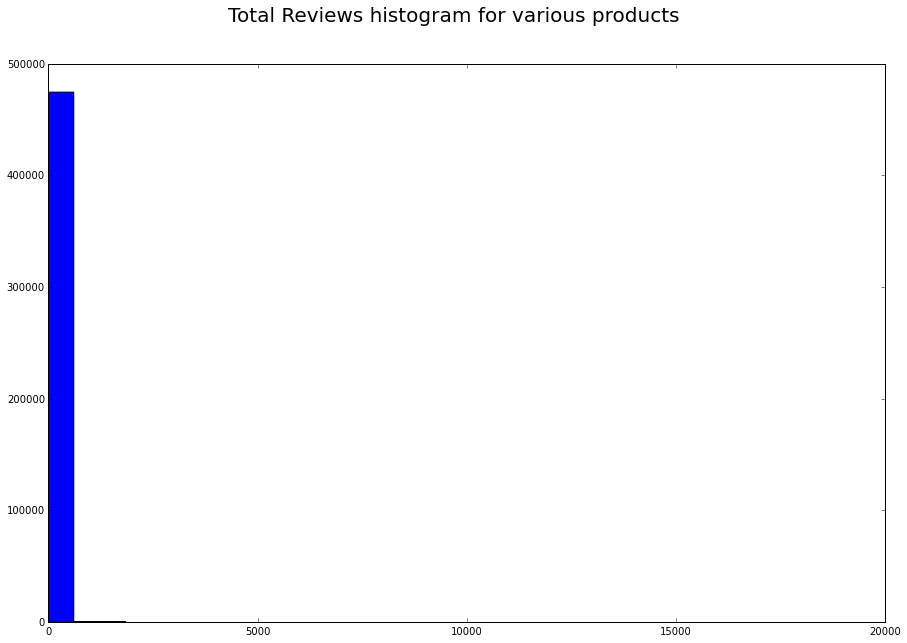

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
t =product_total_rev_freq_cnt_values
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total Reviews histogram for various products ", fontsize=20)
axes.hist(t,bins=30)
 

In [103]:
# product_average_rating_month.tail()
# del sketch_obj
# sketch_obj = gl.Sketch(product_average_rating_month['product id'])
# product_rev_month_cnt=gl.Sketch.frequent_items(sketch_obj)
# product_freq_cnt=gl.Sketch.frequent_items(sketch_obj)

In [128]:
###computing total number of months for which each product was reviewed using the monthly count a product product_rev_month_count2
import graphlab.aggregate as agg
product_rev_month_count2 = product_average_rating_month.groupby(key_columns='product id',
                        operations={'count': agg.COUNT()})
product_rev_month_count2=product_rev_month_count2.sort('count', ascending=False)
product_rev_month_count2

product id,count
B00004SB92,162
B00001P4ZH,146
B00001P4XA,142
B00007KDVI,140
B000062VUO,137
B00008SCFL,132
B00005NIMJ,131
B000065BPB,131
B000065BP9,130
B00001W0DH,127


In [129]:
# product_rev_month_cnt

In [131]:
import numpy as np
product_rev_month_cnt_values= product_rev_month_count2['count']
product_rev_month_cnt_values=np.array(product_rev_month_cnt_values)

(array([  4.14850000e+05,   3.92900000e+04,   1.28840000e+04,
          5.14900000e+03,   2.19700000e+03,   8.86000000e+02,
          3.90000000e+02,   1.95000000e+02,   8.30000000e+01,
          5.70000000e+01,   1.70000000e+01,   4.00000000e+00,
          2.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.]),
 <a list of 13 Patch objects>)

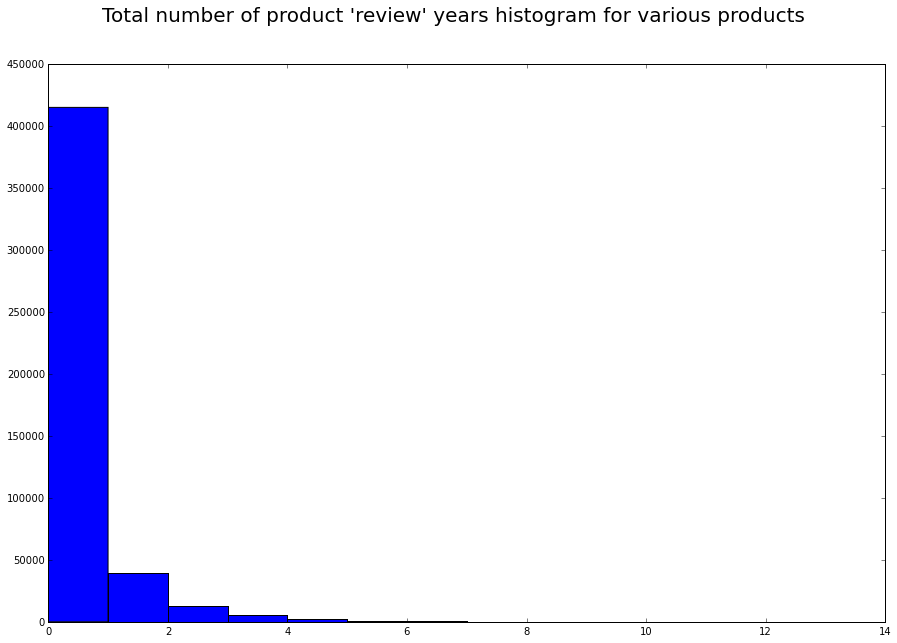

In [132]:
# del t
t=product_rev_month_cnt_values
t =np.ceil(t/12)
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total number of product 'review' years histogram for various products ", fontsize=20)
axes.hist(t,bins=13)

(array([  3.33699000e+05,   5.88200000e+04,   2.79090000e+04,
          1.66510000e+04,   1.10260000e+04,   7.62500000e+03,
          5.32400000e+03,   3.70300000e+03,   2.90800000e+03,
          2.03100000e+03,   1.53500000e+03,   1.18700000e+03,
          8.73000000e+02,   5.20000000e+02,   5.59000000e+02,
          3.86000000e+02,   2.67000000e+02,   2.33000000e+02,
          1.66000000e+02,   1.26000000e+02,   9.80000000e+01,
          7.70000000e+01,   6.40000000e+01,   5.40000000e+01,
          3.20000000e+01,   3.10000000e+01,   2.00000000e+01,
          2.20000000e+01,   1.70000000e+01,   1.70000000e+01,
          4.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   1.        ,    4.92682927,    8.85365854,   12.7804878 ,
          16.70731707,   20.63414634,   24.56097561,   28.48780488,
          32

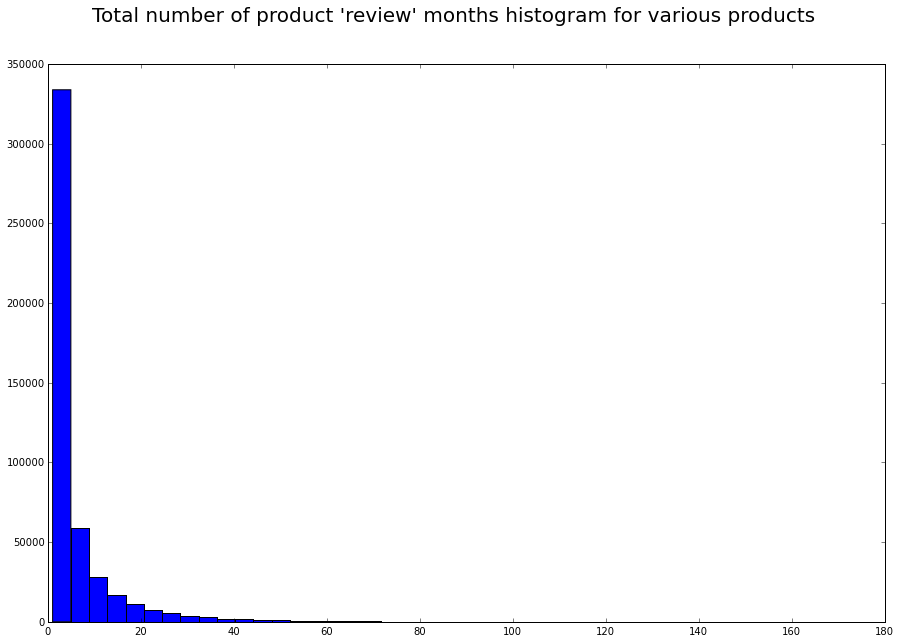

In [133]:
t=product_rev_month_cnt_values
width = 0.3
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,10) )
plt.suptitle("Total number of product 'review' months histogram for various products ", fontsize=20)
axes.hist(t,bins=41)

In [146]:
# product_rev_month_cnt_sorted = sorted(product_rev_month_cnt.items(), key=operator.itemgetter(1),reverse = True)
# # type(product_rev_month_cnt)
# product_rev_month_cnt_sorted

In [111]:
# idx=elec_meta_data['asin']=='B0074BW614'

In [11]:
# elec_meta_data[idx]
import graphlab as gl
elec_rev_data = gl.load_sframe('./elec_rev_data_new')
elec_rev_data = elec_rev_data.unpack('X1', column_name_prefix='')
elec_rev_data.head()


asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
0132793040,"[1, 1]",5.0,Corey Barker does a greatjob of explaining Blend ...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4"""
0321732944,"[0, 0]",5.0,While many beginner DVDstry to teach you ...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie
0439886341,"[1, 1]",1.0,It never worked. Mydaughter worked to earn ...,"04 29, 2013",A2NWSAGRHCP8N5,bowmans2007
0439886341,"[1, 1]",3.0,Some of the functions didnot work properly. My ...,"07 22, 2013",A2WNBOD3WNDNKT,JAL
0439886341,"[4, 4]",1.0,Do not waste your moneyon this thing it is ...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull
0511189877,"[0, 0]",5.0,Dog got the old remoteand destroyed it. Di ...,"04 14, 2014",A1QGNMC6O1VW39,CK
0511189877,"[1, 1]",2.0,"This remote, for whateverreason, was chosen by ...","04 14, 2014",A3J3BRHTDRFJ2G,"EJ Honda ""ejhonda"""
0511189877,"[0, 1]",5.0,We had an old Time WarnerCable remote that was ...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx
0511189877,"[0, 0]",5.0,This unit works just likethe TEC unit only bet ...,"03 23, 2014",A34ATBPOK6HCHY,Nancy C. Johnson
0511189877,"[0, 0]",5.0,It is an exact duplicateof my Time warner ...,"03 22, 2014",A89DO69P0XZ27,Stephen Schultz


In [12]:
elec_rev_data_B0074BW614= elec_rev_data[elec_rev_data['asin']=='B0074BW614']

In [13]:
len(elec_rev_data_B0074BW614)

18245

In [15]:
elec_rev_data_B0074BW614.head()

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName
B0074BW614,"[0, 0]",4.0,good,"07 15, 2014",A3501BQE45OX22,None
B0074BW614,"[0, 0]",5.0,I had been wanting to geta kindle fire for some ...,"06 20, 2013",A2JOZUUH1FKZA5,None
B0074BW614,"[0, 0]",5.0,I love my kindle,"07 18, 2014",A2SMTNHD4IY85U,None
B0074BW614,"[0, 0]",5.0,It came just in Tim and Iam very happy ...,"07 15, 2014",A3HJD8GP1IAE7Y,None
B0074BW614,"[0, 0]",4.0,This is my third kindleand my second fire HD ...,"07 15, 2014",AS1Y9OT3RCV86,None
B0074BW614,"[0, 1]",5.0,"After her Nook tabletdied, my 11-year-old ...","08 19, 2013",A31TEWSLVFR4K,None
B0074BW614,"[0, 1]",2.0,"Amazon has sent us 3Kindle Fires now, so I ...","10 22, 2013",A15J6L46AUJOZX,None
B0074BW614,"[0, 1]",3.0,As an reader this is agreat device. It had ...,"12 16, 2012",A3QJFHH8IA2JBZ,None
B0074BW614,"[0, 1]",5.0,Bought it for my husbandwho is handicapped an ...,"06 26, 2014",A3GYYZ1RIKYB8A,None
B0074BW614,"[0, 1]",3.0,Cannot take picturesunless it is a ...,"12 29, 2013",AC8TUL2N6M4EP,None


In [153]:
#we do it only once
# elec_rev_data_B0074BW614.save('./elec_rev_data_B0074BW614')

In [1]:
# del elec_rev_data_B0074BW614
###analysis of the product with highest number of reviews
import graphlab as gl
elec_rev_data_firetablet = gl.load_sframe('./elec_rev_data_B0074BW614')

[INFO] This trial license of GraphLab Create is assigned to revanthg@hotmail.com and will expire on July 10, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-1125 - Server binary: /Users/revanthgarlapati/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434394649.log
[INFO] GraphLab Server Version: 1.4.0


In [2]:
elec_rev_data_firetablet.head()

product id,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName
B0074BW614,"[0, 0]",4.0,good,"07 15, 2014",A3501BQE45OX22,None
B0074BW614,"[0, 0]",5.0,I had been wanting to geta kindle fire for some ...,"06 20, 2013",A2JOZUUH1FKZA5,None
B0074BW614,"[0, 0]",5.0,I love my kindle,"07 18, 2014",A2SMTNHD4IY85U,None
B0074BW614,"[0, 0]",5.0,It came just in Tim and Iam very happy ...,"07 15, 2014",A3HJD8GP1IAE7Y,None
B0074BW614,"[0, 0]",4.0,This is my third kindleand my second fire HD ...,"07 15, 2014",AS1Y9OT3RCV86,None
B0074BW614,"[0, 1]",5.0,"After her Nook tabletdied, my 11-year-old ...","08 19, 2013",A31TEWSLVFR4K,None
B0074BW614,"[0, 1]",2.0,"Amazon has sent us 3Kindle Fires now, so I ...","10 22, 2013",A15J6L46AUJOZX,None
B0074BW614,"[0, 1]",3.0,As an reader this is agreat device. It had ...,"12 16, 2012",A3QJFHH8IA2JBZ,None
B0074BW614,"[0, 1]",5.0,Bought it for my husbandwho is handicapped an ...,"06 26, 2014",A3GYYZ1RIKYB8A,None
B0074BW614,"[0, 1]",3.0,Cannot take picturesunless it is a ...,"12 29, 2013",AC8TUL2N6M4EP,None


In [3]:
len(elec_rev_data_firetablet)

18245

In [4]:
import pyLDAvis
import pyLDAvis.graphlab
pyLDAvis.enable_notebook()
docs2=elec_rev_data_firetablet['bow']
mtemp = gl.topic_model.create(docs2,num_topics=10,num_iterations=50)
print mtemp.get_topics()
print mtemp.get_topics(output_type='topic_words')
print mtemp['topics']
print mtemp['vocabulary']
print mtemp.get_topics() 

PROGRESS: Learning a topic model
PROGRESS:        Number of documents     18245
PROGRESS:            Vocabulary size     19783
PROGRESS:    Running collapsed Gibbs sampling
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |
PROGRESS: +-----------+---------------+----------------+-----------------+
PROGRESS: | 10        | 1.81s         | 3.62896e+06��� | 0               |
PROGRESS: | 20        | 3.08s         | 3.66627e+06��� | 0               |
PROGRESS: | 30        | 4.31s         | 3.65215e+06��� | 0               |
PROGRESS: | 40        | 5.55s         | 3.70827e+06��� | 0               |
PROGRESS: | 50        | 6.76s         | 4.10238e+06��� | 0               |
PROGRESS: +-----------+---------------+----------------+-----------------+
+-------+--------+-----------------+
| topic |  word  |      score      |
+-------+--------+-----------------+
|   0   |  love  | 0.0496210639499 |
|   

In [ ]:
# pred = mtemp.predict(docs2)

In [5]:
pyLDAvis.graphlab.prepare(mtemp, docs2)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      11.907908        1       1 -0.276125  0.048316
2      11.606895        1       2 -0.070167 -0.125667
7      11.226317        1       3 -0.193720  0.022511
4      10.880757        1       4 -0.097212 -0.094284
5       9.708971        1       5  0.128365 -0.103421
9       9.668332        1       6  0.100329 -0.190475
1       9.648980        1       7 -0.060241  0.148179
0       8.539106        1       8  0.157958  0.183484
8       8.530409        1       9  0.168800 -0.140597
3       8.282325        1      10  0.142014  0.251955, topic_info=      Category          Freq       Term  Total  loglift  logprob
7945   Default  22760.000000     kindle  22760  30.0000  30.0000
1393   Default   8392.000000       love   8392  29.0000  29.0000
3867   Default   7340.000000      great   7340  28.0000  28.0000
3281   Default  12391.000000       fire  12391  27.0000  27.0000
9762   Default   8778.000000         hd   8778  26.0000  26.0000
18291  Default   4242.000000     tablet   4242  25.0000  25.0000
15521  Default   7433.000000     amazon   7433  24.0000  24.0000
4330   Default   4152.000000     device   4152  23.0000  23.0000
4139   Default   5483.000000      books   5483  22.0000  22.0000
11831  Default   3605.000000    reading   3605  21.0000  21.0000
965    Default   3425.000000       easy   3425  20.0000  20.0000
7109   Default   3974.000000       read   3974  19.0000  19.0000
19295  Default   3201.000000     bought   3201  18.0000  18.0000
15613  Default   2880.000000      games   2880  17.0000  17.0000
12711  Default   3353.000000       good   3353  16.0000  16.0000
1996   Default   4532.000000     screen   4532  15.0000  15.0000
19651  Default   4076.000000       apps   4076  14.0000  14.0000
19730  Default   2136.000000       book   2136  13.0000  13.0000
13768  Default   2716.000000         34   2716  12.0000  12.0000
6423   Default   2785.000000    product   2785  11.0000  11.0000
14151  Default   3324.000000       ipad   3324  10.0000  10.0000
10442  Default   2910.000000        don   2910   9.0000   9.0000
6547   Default   1489.000000       year   1489   8.0000   8.0000
7816   Default   2372.000000          7   2372   7.0000   7.0000
1118   Default   1662.000000      happy   1662   6.0000   6.0000
14162  Default   1426.000000      loves   1426   5.0000   5.0000
11931  Default   2369.000000      sound   2369   4.0000   4.0000
4856   Default   1447.000000    problem   1447   3.0000   3.0000
15830  Default   1404.000000       gift   1404   2.0000   2.0000
6751   Default   2136.000000      price   2136   1.0000   1.0000
...        ...           ...        ...    ...      ...      ...
7753   Topic10      9.163430      ninja     10   2.4441  -8.5216
16990  Topic10    170.588249  downloads    195   2.3092  -5.6861
2309   Topic10    123.809335    package    140   2.3216  -6.0051
17325  Topic10     60.993695      curve     67   2.3582  -6.7054
5217   Topic10     81.005094        lap     90   2.3423  -6.4262
12376  Topic10    325.107109   enjoying    387   2.2629  -5.0470
10856  Topic10    195.170755     manual    226   2.2923  -5.5556
483    Topic10    222.198303    clarity    264   2.2658  -5.4266
3867   Topic10   4843.644455      great   7340   2.0307  -2.3366
1393   Topic10   5324.796841       love   8392   1.9818  -2.2516
6423   Topic10   1921.156430    product   2785   2.0659  -3.2704
15655  Topic10    419.903952   expected    535   2.1995  -4.7866
8239   Topic10    169.739031      smart    212   2.2198  -5.6919
16066  Topic10    791.426093    picture   1286   1.9571  -4.1519
9331   Topic10    648.101582   computer   1096   1.9256  -4.3433
9841   Topic10    318.835472    friends    467   2.0565  -5.0655
10391  Topic10    316.098206       mine    468   2.0543  -5.0655
891    Topic10    735.446309     things   1712   1.5996  -4.2233
3281   Topic10   2822.940423       fire  12391   0.9761  -2

In [11]:
# #can use to remove a certain word from text analysis
# # docs = docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)
# docs2=elec_rev_data_firetablet['bow']
# mtemp = gl.topic_model.create(docs2,num_topics=10,num_iterations=50)
# print mtemp.get_topics()
# print mtemp.get_topics(output_type='topic_words')
# print mtemp['topics']
# print mtemp['vocabulary']
# print mtemp.get_topics() 
# pyLDAvis.graphlab.prepare(mtemp, docs2)

In [6]:
elec_rev_data_firetablet['reviewTime']

dtype: str
Rows: 18245
['07 15, 2014', '06 20, 2013', '07 18, 2014', '07 15, 2014', '07 15, 2014', '08 19, 2013', '10 22, 2013', '12 16, 2012', '06 26, 2014', '12 29, 2013', '08 31, 2013', '01 15, 2014', '08 14, 2013', '08 4, 2013', '03 31, 2013', '05 8, 2013', '06 24, 2014', '07 12, 2013', '03 31, 2013', '07 24, 2013', '05 5, 2014', '09 16, 2013', '10 12, 2013', '03 30, 2013', '01 29, 2014', '03 9, 2013', '07 10, 2013', '07 15, 2013', '04 19, 2013', '06 18, 2013', '04 10, 2013', '09 19, 2013', '07 12, 2013', '06 29, 2014', '08 13, 2013', '05 28, 2013', '05 28, 2013', '12 15, 2013', '04 30, 2014', '04 6, 2014', '07 7, 2013', '09 20, 2013', '06 21, 2013', '06 6, 2013', '05 25, 2013', '08 18, 2013', '08 19, 2013', '07 29, 2013', '02 3, 2014', '09 27, 2013', '01 28, 2013', '07 6, 2013', '01 26, 2014', '08 20, 2013', '06 4, 2013', '06 18, 2013', '06 25, 2014', '05 1, 2014', '04 23, 2013', '07 15, 2013', '01 30, 2014', '04 23, 2013', '06 30, 2014', '06 15, 2013', '12 24, 2013', '02 3, 2013'

In [7]:
check=elec_rev_data_firetablet['reviewTime']
xnew=check.str_to_datetime("%m %-d, %Y")
elec_rev_data_firetablet['reviewday']=xnew.split_datetime('',limit=['day'])['day']
elec_rev_data_firetablet['reviewmonth']=xnew.split_datetime('',limit=['month'])['month']
elec_rev_data_firetablet['reviewyear']=xnew.split_datetime('',limit=['year'])['year']
elec_rev_data_firetablet.tail()

product id,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName
B0074BW614,"[0, 0]",5.0,I was stuck between 4 and5 stars for the kindle ...,"08 13, 2013",A32XL21UQ0WQVO,Zoe
B0074BW614,"[0, 0]",5.0,The start stop and volumestitch is to hard to ...,"04 12, 2013",A3W4F865XBIZTG,zoo
B0074BW614,"[1, 1]",5.0,"With a desktop and aniPad, what did I need a ...","06 6, 2013",A1XGGL8NXG9URS,Zsa Zsu Pitts
B0074BW614,"[0, 0]",3.0,I exchanged my firstgeneration for this ...,"12 2, 2013",AOXYYPUG53CAG,ztamber
B0074BW614,"[0, 0]",4.0,The Kindle Fire is agreat eReader/Tablet ...,"04 23, 2013",A1ZRCJ5YXD23DT,Z. Wells
B0074BW614,"[1, 1]",5.0,"First off, I love my newFire HD. I've barely ...","01 1, 2013",A1B4G23001KWR0,Zwingley
B0074BW614,"[0, 0]",5.0,"it's really cool. thoughit doesn't have GPS , or ...","04 21, 2013",A3QJKMPEJWX01W,zy
B0074BW614,"[0, 0]",4.0,I bought a KHD for myGF.A few weeks down the ...,"02 9, 2013",A3Q09YAW0CGXPC,Zykw
B0074BW614,"[1, 1]",5.0,"If you love entertainmentwhether through reading, ...","01 14, 2013",A1O3D41S3NAVTZ,ZZ
B0074BW614,"[2, 2]",5.0,"I am still learning theins and outs , but so ...","09 4, 2013",A3FVH4T8UE2PHD,"zzmz ""crazy to cook"""


In [38]:
# xnew
# elec_rev_data_firetablet['']

In [8]:
product_elec_rating_stats= gl.load_sframe('./product_elec_rating_stats')
product_elec_rating_stats_B0074BW614= product_elec_rating_stats[product_elec_rating_stats['asin']== 'B0074BW614']
product_elec_rating_stats_B0074BW614=product_elec_rating_stats_B0074BW614.sort(sort_columns=['reviewyear','reviewmonth'], ascending=True)

In [9]:
product_elec_rating_stats_B0074BW614['fulldate']=product_elec_rating_stats_B0074BW614['reviewmonth'].astype(str)+'-'+product_elec_rating_stats_B0074BW614['reviewyear'].astype(str)

In [10]:
import datetime
product_elec_rating_stats_B0074BW614
# product_elec_rating_stats_B0074BW614['fulldate'].astype(datetime.datetime)

asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall,fulldate
B0074BW614,9,2012,361,4.4459833795,0.910384345336,9-2012
B0074BW614,10,2012,489,4.65644171779,0.655762888886,10-2012
B0074BW614,11,2012,709,4.77150916784,0.470549427069,11-2012
B0074BW614,12,2012,1890,4.72962962963,0.600194298673,12-2012
B0074BW614,1,2013,2277,4.7527448397,0.55910845052,1-2013
B0074BW614,2,2013,1044,4.7183908046,0.593068919961,2-2013
B0074BW614,3,2013,944,4.59533898305,0.784799642145,3-2013
B0074BW614,4,2013,713,4.56942496494,0.836419826736,4-2013
B0074BW614,5,2013,760,4.46184210526,0.931109568043,5-2013
B0074BW614,6,2013,1044,4.55747126437,0.850710613561,6-2013


In [11]:
check=product_elec_rating_stats_B0074BW614['fulldate']
check.head()
# # xnew=check.str_to_datetime("%d-%-m-%-Y")

# xnew

dtype: str
Rows: 10
['9-2012', '10-2012', '11-2012', '12-2012', '1-2013', '2-2013', '3-2013', '4-2013', '5-2013', '6-2013']

In [12]:
xnew=check.str_to_datetime("%m-%Y")#"%d/%m/%y"%d-%-m-%-Y

In [13]:
product_elec_rating_stats_B0074BW614['fulldate']= xnew
del xnew
# check=gl.Sframe(data=['12-2012'])
# xnew[0].year


In [14]:
product_elec_rating_stats_B0074BW614.sort('fulldate')

asin,reviewmonth,reviewyear,Count,Avg of overall,Stdv of overall,fulldate
B0074BW614,9,2012,361,4.4459833795,0.910384345336,2012-09-01 00:00:00+00:00
B0074BW614,10,2012,489,4.65644171779,0.655762888886,2012-10-01 00:00:00+00:00
B0074BW614,11,2012,709,4.77150916784,0.470549427069,2012-11-01 00:00:00+00:00
B0074BW614,12,2012,1890,4.72962962963,0.600194298673,2012-12-01 00:00:00+00:00
B0074BW614,1,2013,2277,4.7527448397,0.55910845052,2013-01-01 00:00:00+00:00
B0074BW614,2,2013,1044,4.7183908046,0.593068919961,2013-02-01 00:00:00+00:00
B0074BW614,3,2013,944,4.59533898305,0.784799642145,2013-03-01 00:00:00+00:00
B0074BW614,4,2013,713,4.56942496494,0.836419826736,2013-04-01 00:00:00+00:00
B0074BW614,5,2013,760,4.46184210526,0.931109568043,2013-05-01 00:00:00+00:00
B0074BW614,6,2013,1044,4.55747126437,0.850710613561,2013-06-01 00:00:00+00:00


In [15]:
type(product_elec_rating_stats_B0074BW614['Avg of overall'])

graphlab.data_structures.sarray.SArray

In [16]:
xnew=product_elec_rating_stats_B0074BW614['fulldate']

In [17]:
# ynew
xvnew=list(xnew)

In [18]:
print type(xvnew)
print type(xvnew[0])

<type 'list'>
<type 'datetime.datetime'>


In [19]:
y=product_elec_rating_stats_B0074BW614['Avg of overall']

In [20]:
yvnew=list(y)

In [21]:
print type(yvnew)
print type(yvnew[0])

<type 'list'>
<type 'float'>


In [22]:
xvvnew=[item.date() for item in xvnew]
xvvnew[0]
len(xvvnew)
# len(yvnew)
type(xvvnew[0])

datetime.date

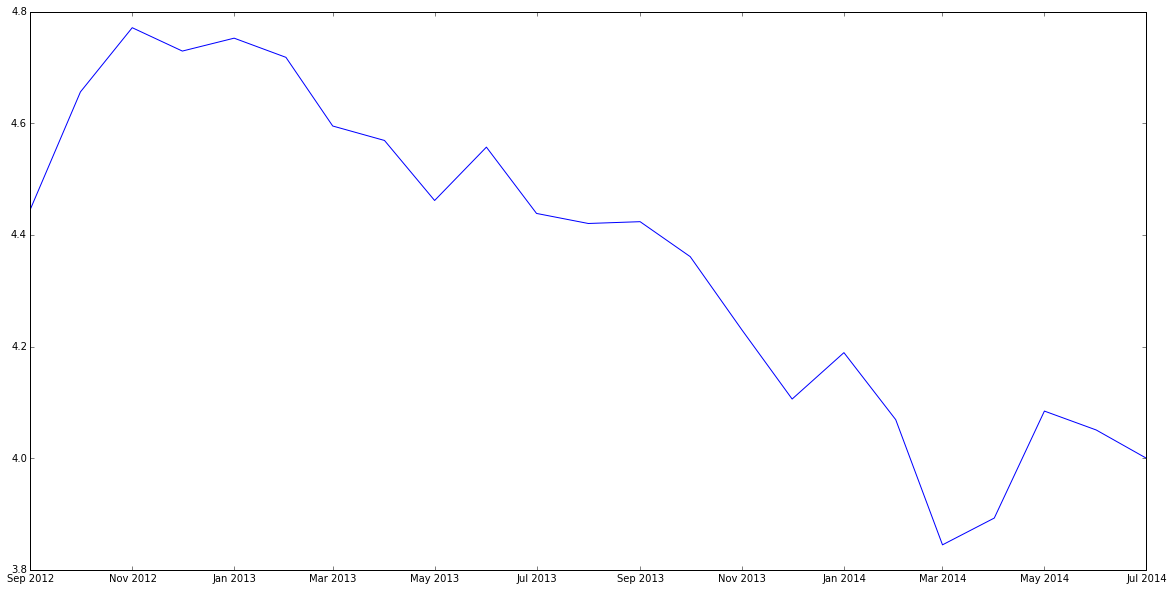

In [24]:
%matplotlib inline
import datetime
import random
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(xvvnew, yvnew)

In [26]:
# print x[0]# type(y[0]),
# # print xvnew[0].date()
# # type(y)
# print xvvnew[0]

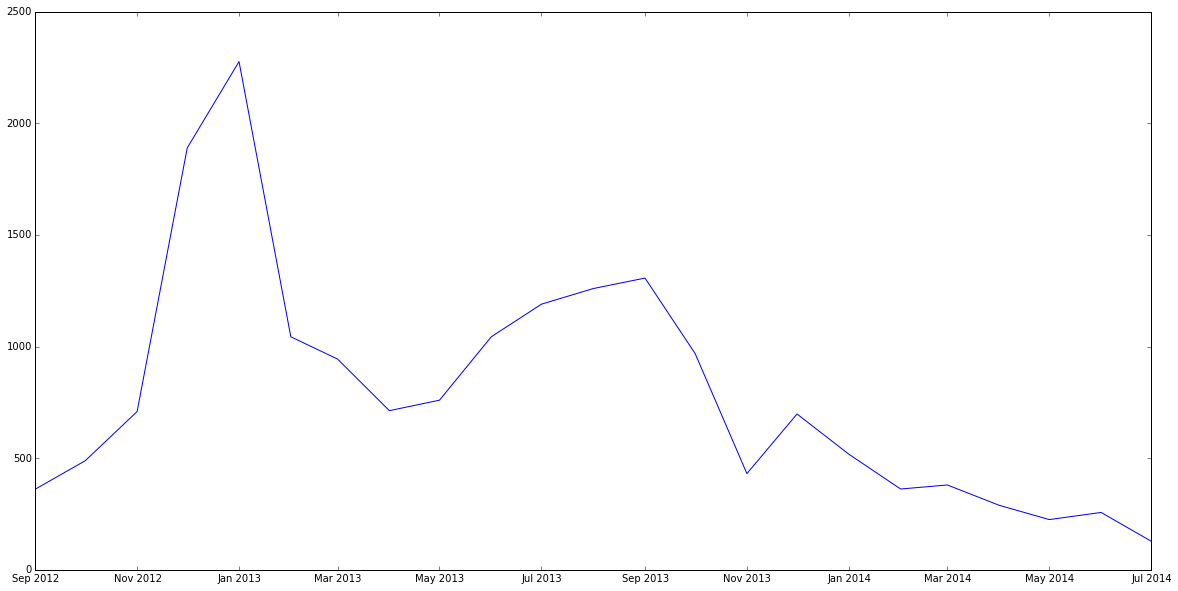

In [27]:
y2=list(product_elec_rating_stats_B0074BW614['Count'])
plt.figure(figsize=(20,10))
plt.plot(xvvnew, y2)
# type(x[0])
# type(x)


In [152]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import corpora, models, similarities

In [179]:
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
stopwords += ['.', ',', '(', ')', "'", '"']

In [149]:
# documents = ["Human machine interface for lab abc computer applications",
#               "A survey of user opinion of computer system response time",
#               "The EPS user interface management system",
#               "System and human system engineering testing of EPS",
#               "Relation of user perceived response time to error measurement",
#               "The generation of random binary unordered trees",
#               "The intersection graph of paths in trees",
#               "Graph minors IV Widths of trees and well quasi ordering",
#               "Graph minors A survey"]

In [154]:
# stopwords
# # remove common words and tokenize
# stoplist = set('for a of the and to in'.split())
# texts = [[word for word in document.lower().split() if word not in stoplist]
#           for document in documents]

In [33]:
# # remove words that appear only once
# from collections import defaultdict
# frequency = defaultdict(int)
# for text in texts:
#      for token in text:
#          frequency[token] += 1

In [89]:
# texts = [[token for token in text if frequency[token] > 1]
#           for text in texts]
# from pprint import pprint   # pretty-printer
# pprint(texts)

In [90]:
# dictionary = corpora.Dictionary(texts)
# dictionary.save('/tmp/deerwester.dict') # store the dictionary, for future reference
# print(dictionary)


In [91]:
# print(dictionary.token2id)
# new_doc = "Human computer interaction"
# new_vec = dictionary.doc2bow(new_doc.lower().split())
# print(new_vec) # the word "interaction" does not appear in the dictionary and is ignored


In [92]:
# corpus = [dictionary.doc2bow(text) for text in texts]
# corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus) # store to disk, for later use
# print(corpus)

In [66]:
###saving 


# class MyCorpus(object):
#      def __iter__(self):
#          for line in list(elec_rev_data_firetablet['reviewText']):
#              # assume there's one document per line, tokens separated by whitespace
#              yield dictionary.doc2bow(line.lower().split())

In [65]:
# temper=list(elec_rev_data_firetablet['reviewText'])
# for item in temper:
# corpora.Dictionary

In [64]:
# corpus_memory_friendly = MyCorpus() # doesn't load the corpus into memory!
# print(corpus_memory_friendly)

In [63]:
# cnt=0
# for vector in corpus_memory_friendly: # load one vector into memory at a time
#     print(vector)
#     cnt=cnt+1
#     if cnt<5:
#         break

In [180]:
###computing dictionary object for firetablet

# collect statistics about all tokens
dictionary = corpora.Dictionary(line.lower().split() for line in elec_rev_data_firetablet['reviewText'])
# remove stop words and words that appear only once
stop_ids = [dictionary.token2id[stopword] for stopword in stopwords
            if stopword in dictionary.token2id]
once_ids = [tokenid for tokenid, docfreq in dictionary.dfs.iteritems() if docfreq == 1]
dictionary.filter_tokens(stop_ids + once_ids) # remove stop words and words that appear only once
dictionary.compactify() # remove gaps in id sequence after words that were removed
print(dictionary)


[INFO] adding document #0 to Dictionary(0 unique tokens: [])
[INFO] adding document #10000 to Dictionary(38431 unique tokens: [u'considered,', u'considered.', u'review.cons:', u'satisfiedgreat', u'vnc,']...)
[INFO] built Dictionary(57662 unique tokens: [u'considered,', u'considered.', u'review.cons:', u'satisfiedgreat', u'vnc,']...) from 18245 documents (total 1498259 corpus positions)


Dictionary(19063 unique tokens: [u'considered,', u'considered.', u'$1.99', u'yellow', u'tinkering,']...)


In [181]:
###saving firetablet dictionary to disk
dictionary.save('./tmp/firetablet.dict')

[INFO] saving Dictionary object under ./tmp/firetablet.dict, separately None


In [199]:
# import nltk
# my_text=['i am using a commbination of NLTK and gensim', 'I find this very funny']
# # words = nltk.word_tokenize(my_text[0])
# # my_bigrams = nltk.bigrams(words)
# # my_trigrams = nltk.trigrams(words)

# texts_uni = [[word for word in document.lower().split() if word not in stopwords]
#            for document in my_text]


# texts_bi= [[item[0]+' '+item[1] for item in nltk.bigrams(document)] for document in texts_uni]





# texts_tri= [[item[0]+' '+item[1] + ' '+item[2]  for item in nltk.trigrams(document)] for document in texts_uni]  



# texts=[]
# for i,j in enumerate(texts_tri):
#     texts.append(texts_uni[i]+texts_bi[i]+ texts_tri[i])
# print texts
  

# #          +([item[0]+' '+item[1]+' '+item[2] for item in document.lower().split() if word not in stopwords])
# print texts_tri
# print texts_bi
# print texts_uni


# # print words

# # for item in my_bigrams:
# #     print item[0]+' '+item[1]
# # # print my_trigrams

# # for item in my_trigrams:
# #     print item[0]+' '+item[1]+' '+item[2]

In [200]:
texts=[]
texts_tri=[]
texts_bi=[]
texts_uni=[]

In [201]:
# remove common words and tokenize the documents/reviews of firetablet
# stoplist = set('for a of the and to in'.split())
import nltk

texts = [[word for word in document.lower().split() if word not in stopwords]
          for document in elec_rev_data_firetablet['reviewText']]

texts_uni = [[word for word in document.lower().split() if word not in stopwords]
           for document in elec_rev_data_firetablet['reviewText']]


texts_bi= [[item[0]+' '+item[1] for item in nltk.bigrams(document)] for document in texts_uni]


texts_tri= [[item[0]+' '+item[1] + ' '+item[2]  for item in nltk.trigrams(document)] for document in texts_uni] 

texts=[]
for i,j in enumerate(texts_tri):
    texts.append(texts_uni[i]+texts_bi[i]+ texts_tri[i])
    
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
     for token in text:
         frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
          for text in texts]


In [209]:
print texts[1]
print 
print elec_rev_data_firetablet['reviewText'][1]

['wanting', 'get', 'kindle', 'fire', 'time.', 'daughter', 'saved', 'get', 'one', 'birthday.', 'love', 'it!', 'durable,', 'great', 'battery', 'life,', 'good', 'sound,', 'excellent', 'touchscreen,', 'actually', 'really', 'like', 'reading', 'e-books', "(wasn't", 'sure', 'even', 'unfortunate', 'accident', 'screen', 'down,', 'rock', 'causing', 'multiple', 'cracks', 'screen)', 'device', 'continued', 'work', 'service', 'wonderful', 'replacement', 'came', 'quickly.', 'new', 'kindle', 'screen', 'protector', 'touchscreen,', 'inexpensive', 'lesson', 'recommend', 'buying', 'replacement', 'warranty', 'good', 'hubby', 'purchased', 'cheaper,', 'tablet', '(for', 'son).', 'big', 'difference,', 'especially', 'battery', 'life.', 'kindle', 'fire', 'hd', 'far', 'superior.', 'kindle', 'also', 'far', 'affordable', 'complaint', "doesn't", 'come', 'charger,', 'usb', 'cable.', 'wanting get', 'get kindle', 'kindle fire', 'fire time.', 'time. daughter', 'daughter saved', 'saved get', 'get one', 'one birthday.', '

In [218]:
###computing dictionary object for firetablet

# collect statistics about all tokens
dictionary = corpora.Dictionary(text for text in texts)
# remove stop words and words that appear only once
stop_ids = [dictionary.token2id[stopword] for stopword in stopwords
            if stopword in dictionary.token2id]
once_ids = [tokenid for tokenid, docfreq in dictionary.dfs.iteritems() if docfreq == 1]
dictionary.filter_tokens(stop_ids + once_ids) # remove stop words and words that appear only once
dictionary.compactify() # remove gaps in id sequence after words that were removed
print(dictionary)

[INFO] adding document #0 to Dictionary(0 unique tokens: [])
[INFO] adding document #10000 to Dictionary(104154 unique tokens: [u'everything it.', u'considered,', u'considered.', u'close together,', u'mail apps']...)
[INFO] built Dictionary(120607 unique tokens: [u'everything it.', u'considered,', u'considered.', u'shut again.', u'close together,']...) from 18245 documents (total 1216985 corpus positions)


Dictionary(118841 unique tokens: [u'everything it.', u'considered,', u'considered.', u'shut again.', u'close together,']...)


In [220]:
#creation of corpus
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('./tmp/firetablet.mm', corpus) # store to disk, for later use

[INFO] storing corpus in Matrix Market format to ./tmp/firetablet.mm
[INFO] saving sparse matrix to ./tmp/firetablet.mm
[INFO] PROGRESS: saving document #0
[INFO] PROGRESS: saving document #1000
[INFO] PROGRESS: saving document #2000
[INFO] PROGRESS: saving document #3000
[INFO] PROGRESS: saving document #4000
[INFO] PROGRESS: saving document #5000
[INFO] PROGRESS: saving document #6000
[INFO] PROGRESS: saving document #7000
[INFO] PROGRESS: saving document #8000
[INFO] PROGRESS: saving document #9000
[INFO] PROGRESS: saving document #10000
[INFO] PROGRESS: saving document #11000
[INFO] PROGRESS: saving document #12000
[INFO] PROGRESS: saving document #13000
[INFO] PROGRESS: saving document #14000
[INFO] PROGRESS: saving document #15000
[INFO] PROGRESS: saving document #16000
[INFO] PROGRESS: saving document #17000
[INFO] PROGRESS: saving document #18000
[INFO] saved 18245x118841 matrix, density=0.051% (1101312/2168254045)
[INFO] saving MmCorpus index to ./tmp/firetablet.mm.index


In [221]:
class MyCorpus(object):
     def __iter__(self):
         for line in elec_rev_data_firetablet['reviewText']:
             # assume there's one document per line, tokens separated by whitespace
             yield dictionary.doc2bow(line.lower().split())

In [222]:
corpus_memory_friendly = MyCorpus() # doesn't load the corpus into memory!
print(corpus_memory_friendly)

In [88]:
# cnt=0
# for vector in corpus_memory_friendly: # load one vector into memory at a time
#     cnt=cnt+1
#     if cnt<3:
#         print(vector)
        

In [144]:
###loading stored dictionary and corpus
# dictionary = corpora.Dictionary.load('/tmp/firetablet.dict')
# corpus = corpora.MmCorpus('/tmp/firetablet.mm')
# print(corpus)


In [145]:
# tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [143]:
# doc_bow = [(0, 1), (1, 1)]
# print(tfidf[doc_bow]) # step 2 -- use the model to transform vectors

In [142]:
# corpus_tfidf = tfidf[corpus]
# for doc in corpus_tfidf:
#      print(doc)

In [139]:
# lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize an LSI transformation
# corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [138]:
# lsi.print_topics(2)

In [102]:
# for doc in corpus_lsi: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
#      print(doc)

In [101]:
# for doc in corpus_lsi: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
#      print(doc)

In [226]:
model = models.ldamodel.LdaModel(corpus_memory_friendly, id2word=dictionary, num_topics=100)

[INFO] using symmetric alpha at 0.01
[INFO] using serial LDA version on this node
[WARNING] input corpus stream has no len(); counting documents
[INFO] running online LDA training, 100 topics, 1 passes over the supplied corpus of 18245 documents, updating model once every 2000 documents, evaluating perplexity every 18245 documents, iterating 50x with a convergence threshold of 0.001000
[WARNING] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[INFO] PROGRESS: pass 0, at document #2000/18245
[INFO] merging changes from 2000 documents into a model of 18245 documents
[INFO] topic #50 (0.010): 0.023*love + 0.020*kindle + 0.015*it. + 0.014*fire + 0.009*one + 0.008*much + 0.008*would + 0.007*really + 0.007*got + 0.007*year
[INFO] topic #28 (0.010): 0.037*kindle + 0.025*fire + 0.014*would + 0.011*hd + 0.009*amazon + 0.009*great + 0.008*get + 0.007*love + 0.007*use + 0.006*like
[INFO] topic #91 (0.010): 0.019*love + 0.018

In [227]:
#saving lda model
model.save('./tmp/firetablet.lda') # same for tfidf, lda, ...

[INFO] saving LdaState object under ./tmp/firetablet.lda.state, separately None
[INFO] storing numpy array 'sstats' to ./tmp/firetablet.lda.state.sstats.npy
[INFO] saving LdaModel object under ./tmp/firetablet.lda, separately None
[INFO] storing numpy array 'expElogbeta' to ./tmp/firetablet.lda.expElogbeta.npy
[INFO] not storing attribute state
[INFO] not storing attribute dispatcher


In [122]:
# lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

In [112]:
# doc = "Human computer interaction"
# vec_bow = dictionary.doc2bow(doc.lower().split())
# vec_lsi = lsi[vec_bow] # convert the query to LSI space
# print(vec_lsi)


In [121]:
#  index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it

In [120]:
# index.save('/tmp/firetablet.index')
# index = similarities.MatrixSimilarity.load('/tmp/firetablet.index')
 

In [118]:
# sims = index[vec_lsi] # perform a similarity query against the corpus
# print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples


In [116]:
# sims = sorted(enumerate(sims), key=lambda item: -item[1])

In [119]:
# print(sims)

In [ ]:
model.show_topics()

[u'0.035*meets + 0.032*want. + 0.020*disappointed. + 0.020*upgrades + 0.020*perfect! + 0.020*child + 0.019*handy + 0.017*busy + 0.015*one, + 0.015*dropping',
 u'0.036*tv + 0.028*shows + 0.023*prime + 0.022*expectations. + 0.021*cable + 0.019*membership + 0.019*watch + 0.015*great + 0.013*though. + 0.013*hdmi',
 u'0.021*updates + 0.019*soft + 0.017*tablet! + 0.015*be. + 0.014*significantly + 0.014*improvements + 0.013*e-book + 0.013*build + 0.012*fixed + 0.011*subscribing',
 u'0.028*market + 0.019*flick + 0.017*first. + 0.017*kindle + 0.017*literally + 0.016*wrong. + 0.015*sharing + 0.015*situation + 0.014*tapping + 0.014*bag.',
 u'0.039*music. + 0.023*micro + 0.021*portability + 0.020*chose + 0.017*con + 0.015*available. + 0.014*see. + 0.014*school + 0.013*updated + 0.013*recharge',
 u'0.039*kindle + 0.020*fire + 0.016*hd + 0.011*love + 0.011*mostly + 0.010*read + 0.010*much + 0.009*one + 0.009*ipad. + 0.009*reading',
 u'0.052*enjoyed + 0.038*pictures. + 0.035*mom + 0.028*winner + 0.01

In [ ]:
# dictionary = gensim.corpora.Dictionary.load('newsgroups.dict')
# corpus = gensim.corpora.MmCorpus('newsgroups.mm')
# lda = gensim.models.ldamodel.LdaModel.load('newsgroups_50.model')
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(model, corpus, dictionary)

In [131]:
###saving the html of visualisation
###serve it by using the simple python Http server in the folder where the html file is present 
##save() command works, show does not
# data=pyLDAvis.gensim.prepare(model, corpus, dictionary)
# pyLDAvis.save_html(data, 'pyldavis.html')

In [137]:
# pyLDAvis.show(data, ip='127.0.0.1', port=8000, n_retries=50, local=True, open_browser=True, http_server=None)
##talk to AAron if he or me have time.